In [0]:
#!pip install mglearn 

# 분류 모형의 성능 평가 측도
---

분류 모형(알고리즘)은 기계 학습에서 중요한 모형이다.
회귀 모형과  달리 훈련된 분류 모형의 성능을 평가하는 측도는 다양하다.
여기서는 분류 모형의 성능을 측정하는 여러 가지 측도에 대해 알아보기로 하자.

어떤 환자의 검사 결과가 음성(정상)인지 양성(질환)인지를 예측하는 것과 같이 두 가지로 분류하는 모형을 이진 분류 모형이라고 한다.
먼저 이진 분류 모형의 성능을 측정하는 측도를 중심으로 알아보기로 하자.
3가지 이상으로 분류하는 모형의 성능은 이진 분류 모형의 성능을 평가하는 측도를 일반화한 것에 지나지 않는다.

### 오차 행렬
---

훈련된 이진 분류 모형의 분류 결과는 아래의 2x2 행렬로 정리할 수 있는데 이를 오차 행렬(confusion matrix)이라고 한다.
이 표에서 Actual Negative class와 Actual Positive class는 Target의 실제 값은 나타내고, Predicted Negative class와 Predicted Positive class는 분류 모형의 분류 결과를 나타낸다.
여기서 negative은 음성 또는 거짓을 positive는 양성 또는 참을 나타낸다.
일반적으로 오차 행렬에서 target의 참값은 행에 나타내고 분류 결과는 열에 나타낸다.

| 구분 | **Predicted Negative class** | **Predicted Positive class** |
|:---|:---|:---|
|**Actual Negative class** | True Nagative(TN) | False Positive(FP) |
|**Actual Positive class** | False Negative(FN) | True Positive(TP) |

오차 행렬의 각 셀에 기재된 TN(True Nagative), FP(False Positive), FN(False Negative), TP(True Positive)의 의미는 다음과 같다.

- True Positive(TP) : 실제 Positive인 것을 Positive로 예측한 빈도
- False Positive(FP) : 실제 Negative인 것을 Positive라고 예측한 빈도(제1종 오류를 범한 빈도)
- False Negative(FN) : 실제 Positive인 것을 Negative라고 예측한 빈도(제2종 오류를 범한 도수)
- True Negative(TN) : 실제 Negative인 값을 Negative라고 예측한 빈도

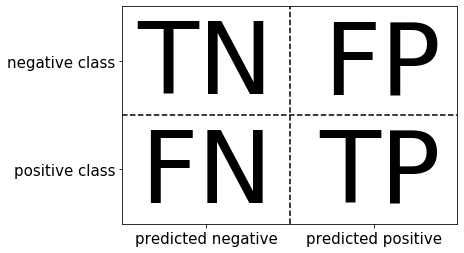

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn
mglearn.plots.plot_binary_confusion_matrix()
plt.show()

아래에서 예제 코드에서 y_true는 target의 참값이고 y_pred는 분류 결과이며, 0과 1은 각각 negative와 positive를 나타낸다.
참값과 분류 결과로부터 오차 행렬을 작성하는 것은 어렵지 않다.

In [19]:
from sklearn.metrics import confusion_matrix
y_true = [1, 0, 1, 1, 0, 0]
y_pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y_true, y_pred)

array([[2, 1],
       [1, 2]])

## 분류 모형의 성능 평가 측도
---

분류 모형의 성능 평가 측도가 다양하지만 그 중에서 가장 기본적인 것은 Accuracy(정확도), Precision(정밀도), Recall(재현율), F1 score이다.
이들은 다음과 같이 정의된다. 
 
1. Accuracy(정확도)
    - 제대로 분류하는 정도를 측정하는 측도로 제대로 분류한 자료의 상대 도수이다.
    - 정확도는 모델의 성능을 나타내는 직관적인 평가 측도지만, 불균형 자료에서는 보완이 필요한 측도이다. 
    - 불균형 자료란 이진 분류 자료에서 한 분류 항목의 자료가 다른 분류 항목에 비해 월등히 많은 자료를 말한다. 이런 경우 분률 모형은 자료가 많은 분류 항목은 제대로 분류하지만 다른 분류 항목은 제대로 분류하지 못하더라도 정확도는 높게 나오기 때문에 평가 측도로서의 한계를 보인다.
    
$$ Accuracy =\frac{TP + TN}{TP + TN + FP + FN}$$

2. Precision(정밀도)

    - precision 또는 positive predictive value(PPV, 양성예측값)이라고 한다. 
    - positive라고 예측된 것 중에서 실재로 positive 인 것의 비율을 말한다.
    - 정밀도는 False Positive를 줄이는 것이 바람직할 때 적절한 평가 측도이다.

$$ Precision =\frac{TP}{TP + FP}$$

3. Recall(재현율)

    - 민감도(sensitivity), 적중률(hit rate), TPR(true positive rate)이라고도 한다.
    - Positive로 분류한 자료에서 실제로 Positive한 자료의 비율을 말한다.
    - 재현율은 False Negativie를 줄이는 것이 바람직할 때 적절한 평가 측도이다.
    - 모든 자료를 Positive로 분류하면 재현율을 높일 수 있지만, False Positive도 많이 발생하기 때문에 정밀도가 낮아딘다. 즉, 재현율과 정밀도는 서로 반대 방향으로 움직인다.

$$ Recall = \frac{TP}{TP + FN} $$

4. F1 score

    - 정밀도와 재현율의 조화 평균으로 계산된다.
    - 정밀도와 재현율을 같이 고려하므로 불균형 자료의 경우 정확도보다 더 합리적인 평가 측도로 생각된다.

$$ F_{1} = 2 \times \frac{Precision \times Recall}{Precision + Recall} = 2 \times \frac{정밀도 \times 재현율}{정밀도 + 재현율}= \frac{2TP}{2TP + FP + FN}$$


위에서 설명한 4가지 지표들 외에도 오차행렬로 계산할 수 있는 지표가 많다. [위키피디아](https://en.wikipedia.org/wiki/Confusion_matrix)에 다양한 방법이 정리되어 있으니 참고하면 된다. 

### 예제

In [0]:
# from sklearn.datasets import load_digits
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 예제 데이터셋 불러오기 
digits = load_digits()

# 10 개 숫자를 분류하는 문제지만
# 9인지 아닌지를 분류하는 이진 분류 문제로 변환한다.
Y = digits.target == 9 # 0~8 false, 9 treu

# 학습데이터와 평가데이터셋 분리
X_tr, X_ts, Y_tr, Y_ts = train_test_split(digits.data, Y, random_state=12345)

In [21]:
# 의사결정나무
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_tr, Y_tr)

pred_tree = tree.predict(X_ts)
#성능 확인
print(f"의사결정나무 성능은:{tree.score(X_ts, Y_ts)}")

의사결정나무 성능은:0.9222222222222223


In [22]:
from sklearn.metrics import confusion_matrix
# 오차 행렬
confusion = confusion_matrix(Y_ts, pred_tree)
confusion

array([[384,  22],
       [ 13,  31]])

In [23]:
from sklearn import metrics

accuracy = metrics.accuracy_score(Y_ts, pred_tree)
precision = metrics.precision_score(Y_ts, pred_tree)
recall = metrics.recall_score(Y_ts, pred_tree)
f1 = metrics.f1_score(Y_ts, pred_tree)
print('Accuracy: {:.3f}, Precison: {:.3f}, Recall: {:.3f}, F1 score: {:.3f}'.format(accuracy, precision, recall, f1))

Accuracy: 0.922, Precison: 0.585, Recall: 0.705, F1 score: 0.639


sklearn.metrics의 classification_report를 이용하면 정밀도, 재현율, f1 score를 한번에 계산할 수 있다.

- 출력 결과에서 False는 Negative 분류 항목을, True는 Positive 분류 항목을 나타낸다.
- 'macro' 평균은 분류 항목의 자료 수에 상관없이 모든 분류 항목에 같은 비중을 주고 분류 항목별 f1 score의 평균을 계산한 것이다. 
- 'micro' 평균은 모든 분류 항목의 FP, FN, TP의 합을 구하여 정밀도, 재현율, f1 score를 계산한 것이다. 
- 'weighted' 평균은 분류 항목의 자료 수를 가중치로 하여 분류 항목별 정밀도, 재현율, f1 score의 가중 평균을 평균을 계산한 것이다. 

In [24]:
from sklearn.metrics import classification_report

print(f'의사결정나무의 성능 \n {classification_report(Y_ts, pred_tree)}')

의사결정나무의 성능 
               precision    recall  f1-score   support

       False       0.97      0.95      0.96       406
        True       0.58      0.70      0.64        44

    accuracy                           0.92       450
   macro avg       0.78      0.83      0.80       450
weighted avg       0.93      0.92      0.93       450



## 다항 분류 모형의 성능 평가 측도
---

다중 분류 모형의 성능 의 평가 측도는 기본적으로 이진 분류 모형의 평가 측도를 일반화한 것이다.

### 예제

In [0]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# 예제 데이터셋 불러오기 
digits = load_digits()

# 학습데이터와 평가데이터셋 분리
X_tr, X_ts, Y_tr, Y_ts = train_test_split(digits.data, digits.target, random_state=0)

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=12345)
clf.fit(X_tr, Y_tr)

pred_tree = clf.predict(X_ts)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
from sklearn.metrics import confusion_matrix

# 오차 행렬
confusion_matrix(Y_ts, pred_tree)

array([[36,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 4, 10,  2,  0,  5,  1, 12,  4,  1,  4],
       [ 2,  1, 37,  2,  0,  0,  1,  0,  1,  0],
       [ 0,  1,  9, 26,  0,  5,  0,  1,  2,  1],
       [ 3,  0,  0,  0, 30,  0,  4,  1,  0,  0],
       [ 4,  0,  0,  3,  0, 36,  3,  0,  0,  2],
       [ 0,  0,  1,  0,  1,  0, 50,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  1,  2, 43,  0,  0],
       [ 0,  3, 12,  9,  4,  0,  0,  8,  9,  3],
       [ 1,  1,  6, 19,  0,  0,  0,  3,  0, 17]])

confusion matrix를 시각화 하여 표현할 수 있다. 

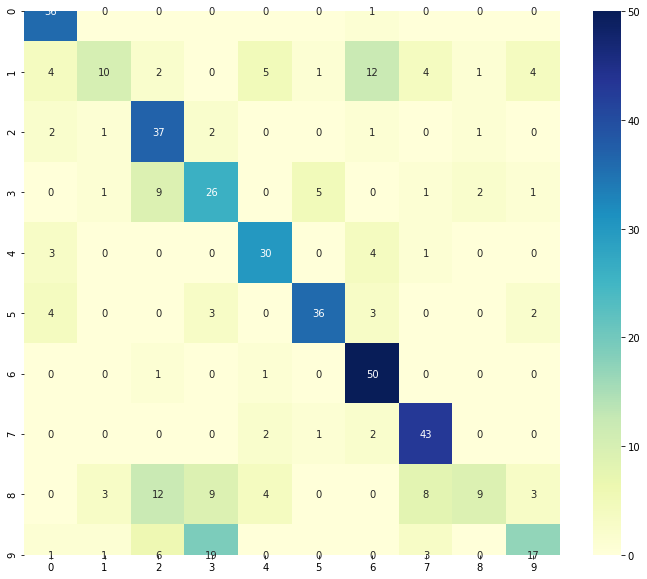

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

confusion = confusion_matrix(Y_ts, pred_tree)
ticks = np.arange(0.5, 10.5, 1)
plt.figure(figsize=(12, 10))
sns.heatmap(confusion, annot=True, fmt="d", cmap="YlGnBu")
plt.xticks(ticks, ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], size=10)
plt.yticks(ticks, ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], size=10)
plt.show()

In [29]:
from sklearn.metrics import classification_report

print(f'성능 \n {classification_report(Y_ts, pred_tree)}')

성능 
               precision    recall  f1-score   support

           0       0.72      0.97      0.83        37
           1       0.62      0.23      0.34        43
           2       0.55      0.84      0.67        44
           3       0.44      0.58      0.50        45
           4       0.71      0.79      0.75        38
           5       0.84      0.75      0.79        48
           6       0.68      0.96      0.80        52
           7       0.72      0.90      0.80        48
           8       0.69      0.19      0.30        48
           9       0.63      0.36      0.46        47

    accuracy                           0.65       450
   macro avg       0.66      0.66      0.62       450
weighted avg       0.66      0.65      0.62       450



#### 참고

- 파이썬 라이브러리를 활용한 머신러닝, 한빛 미디어
- Confusion matrix, 위키피디아
- scikit learn 문서